In [1]:
import numpy as np
from numpy import *
from math import pi
import matplotlib as mpl
from matplotlib import animation
from matplotlib import pyplot as plt
from time import sleep
from IPython.display import clear_output

In [2]:
def cenDiff(x,y): #4th order central difference stencil method
    
    if size(x) != size(y): #Check for simmilar size between x and y
        print("x and y not the same size!")
        return
    
    nx = size(x) #Get the number of x values
    dydx = zeros(nx) #Create an array of 0's with a simmilar size to x as stored in nx
    h = 0.001
    
    dydx[0] = (((-3*y[0]) + (4*y[1]) + (-1*y[2])) / (2*h)) / (((-3*x[0]) + (4*x[1]) + (-1*x[2])) / (2*h))
    dydx[1] = (((-3*y[0+1]) + (4*y[1+1]) + (-1*y[2+1])) / (2*h)) / (((-3*x[0+1]) + (4*x[1+1]) + (-1*x[2+1])) / (2*h))
    
    for i in range(2,nx-2):
        dydx[i] = (((y[i-2]) - (8*y[i-1]) + (8*y[i+1]) - (y[i+2])) / (12*h)) / (((x[i-2]) - (8*x[i-1]) + (8*x[i+1]) - (x[i+2])) / (12*h))
    
    dydx[-1] = (((3*y[nx-1]) + (-4*y[nx-2]) + (y[nx-3])) / (2*h)) / (((3*x[nx-1]) + (-4*x[nx-2]) + (x[nx-3])) / (2*h))
    dydx[-2] = (((3*y[nx-1-1]) + (-4*y[nx-2-1]) + (y[nx-3-1])) / (2*h)) / (((3*x[nx-1-1]) + (-4*x[nx-2-1]) + (x[nx-3-1])) / (2*h))
    
    return dydx #Return the dydx list

def dataLoad(path, filename, col1): #Load data, from (path+filename) pull from (col1) columns
    time = loadtxt(path+"/"+filename, usecols=(0), unpack=True)
    outData = loadtxt(path+"/"+filename, usecols=(col1[0], col1[1], col1[2]), unpack=True)
    return(time, outData) #Return (time) and (outData), as an array

def getData2D(time, QzzDat, theta=[np.pi/2], derivType=0):
    #[/] What does this function do?
    #Load in data from a given file, using two coloumns (0,col1).
    #Run it through an equation to extract the gravitational wave (GW) signal.
    #Return GW signal and time as h, t respectively

    #t, Qzz = loadtxt(filename, usecols=(0,col1), unpack=True) #Load in data (0,col1) from file 
    QddotZZ = cenDiff(time,QzzDat) #Get the dy/dx (dQzz/dt) values for the data 
    
    #[/] Want Newton's constant divided by the speed of light to the fourth power: G/c^4 [in cgs units]
    Gc4 = (6.674E-8) / (2.997E10)**4  
    
    #[/] Want 10 Kilaparsecs converted to cm
    distance = 10 * (3.085677E21) 
    
    if derivType == 0:
        #[/] Want Equation (3) from this paper (ignore the sin^2 term for now): https://arxiv.org/pdf/2011.09000.pdf
        h = (3/2) * (Gc4/distance) * QddotZZ 
    
    else:
        hConstants = (3/2) * (Gc4/distance) * (np.sin(theta)**2)
        
        h = np.outer(QddotZZ,hConstants)
        
    return time, h

def get2D(time, fullQzzDat, tbounce=0.0, theta=[np.pi/2], viewAngleYN=0):
    """
    Input:
        path : the path of flash.dat file
        fname: the file name of flash.dat
        tbounce: the bounce time in seconds

    Output:
        time:
        hplus50:
        hplus150:
        hplusInf:
        hplusTot:
    """
    #fn  = path+"/"+fname
    
    #Below you will input column numbers from the .dat files you worked with last week
    
    t1, hplus50  = getData2D(time, fullQzzDat[0], theta, viewAngleYN) #[/] Want the "ddI yy r<50km" column here (be careful of python indexing)
    t1, hplus150 = getData2D(time, fullQzzDat[1], theta, viewAngleYN) #[/] Want the "ddI yy 50<r<150" column here
    t1, hplusInf = getData2D(time, fullQzzDat[2], theta, viewAngleYN) #[/] Want the "ddI yy r>150km" column here
    
    hplusTot = hplus50 + hplus150 + hplusInf

    time = t1 - tbounce

    return time, hplus50, hplus150, hplusInf, hplusTot

In [3]:
#(https://watermark.silverchair.com/128-183.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAs8wggLLBgkqhkiG9w0BBwagggK8MIICuAIBADCCArEGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMjTqC-mjavhdU-GTsAgEQgIICghnArifHcDpJA81JGdo5Ef4SO5kENQO57VuQ3g9ElVSiP02pDdeVx4kaCW6p7iwwBOejiFhPXA7kcqWJro4fwwI53B8ayQt5tuyURGzoCzLHEjOdC7pCz_injcByakAI98L8qiSR0GNqKdgwNrK4lQc5S8Oz62DkRK9PHHBazftQwFMHplD6lLy9Eq2fZOxZpkm0cZlP2jB5UoK5jBCvQtPu5ogAh8Q_mkWDvhE1Zl61XZOhUg78_YaURvrF4MbMZGSwy_fMpdrrmJN4hzytaAWBqD0QaKf-kDo2uw2Msx2Z8a7GRO5P1HCqyM7Zysd08LiX8sT5qyfO1I8KnGtS3WDk7C5N1oCyL9dsvZEpRKSysB8ewaRF_d3vNejfXr48bF_8_Ahmznwm_l-21g7jFVFobtoehluIuh6vY5iyG0JNShJHDkDofLAJqoBAJnGdzb16MMg8Yu8L_Crq0_DdkKR915AIZpdEzstSsy7mNsI-_4EXR72zKDF4u0s5pqTBLf7abdF6bq0YQHKqRqvdNtdb-ulTw54kUCyDAu8fY1UmZa6kpuIop-VSrGVsQKTdnD31VUMKQ4SbSjiCA9m5vdpzau8Nsl_axpjQ-9fDFc-ehIq8TRTA-a8zSx84OoT6105dVZ3ioYTpeobMfsj0WrvT5qIUM_kQ0FiwZgmFCPw07JKfXMdH6dd0Mnc_ikN0Ap_aPYVKlSohvtaVE8j-IXFIJ_Id1qVtebvG_JEkz38LGxII7wHsiMo8OUSVSAi4xyB-wdBD_l18OiV9Wa7AIgMpaFVbEnepLrtnGoFXjpOu3swQuOanxqedsbBS6pmv4xtwwtMaBjM53tFFj0HsbFA6aw)
#(https://arxiv.org/pdf/2011.09000.pdf)
def getDataPlusGeneral(filename,theta,phi,col1,col2,col3,col4,col5,col6,CenDiff=True):
    #get h+ in terms of arbitrary angle [M.A.P 4 June'19]
    t,Qxx,Qyy,Qxy,Qxz,Qyz,Qzz = loadtxt(filename, usecols=(0,col1,col2,col3,col4,col5,col6), unpack=True)
    #If True, .dat files contain first time derivative of Q, else
    #.dat files contain second time derivative of Q
    if (CenDiff == True):
        QddotXX = cenDiff(t,Qxx)
        QddotYY = cenDiff(t,Qyy)
        QddotXY = cenDiff(t,Qxy)
        QddotXZ = cenDiff(t,Qxz)
        QddotYZ = cenDiff(t,Qyz)
        QddotZZ = cenDiff(t,Qzz)
    else:
        QddotXX = Qxx
        QddotYY = Qyy
        QddotXY = Qxy
        QddotXZ = Qxz
        QddotYZ = Qyz
        QddotZZ = Qzz
    Gc4 = 6.67e-8/3e10/3e10/3e10/3e10 #constants
    distance = 10.e3*3.086e18 # [10 kpc]
    
    #h+ calculcation (Does this match?  Beware it may use some trig identities)
    h = 1.0*Gc4/distance*(QddotXX*(np.cos(theta)*np.cos(theta)*np.cos(phi)*np.cos(phi)-np.sin(phi)*np.sin(phi))+ \
                          QddotYY*(np.cos(theta)*np.cos(theta)*np.sin(phi)*np.sin(phi)-np.cos(phi)*np.cos(phi))- \
                          QddotXY*(np.cos(theta)*np.cos(theta)+1)*np.sin(2.*phi)+QddotZZ*np.sin(theta)*np.sin(theta)- \
                          (QddotXZ*np.cos(phi) + QddotYZ*np.sin(phi))*np.sin(2*theta))
    ts = t
    return ts, h

def plusGeneral(theta,phi,t,Qxx,Qyy,Qxy,Qxz,Qyz,Qzz,CenDiff=True): #No data loading version
    #get h+ in terms of arbitrary angle [M.A.P 4 June'19]
    #If True, .dat files contain first time derivative of Q, else
    #.dat files contain second time derivative of Q
    if (CenDiff == True):
        QddotXX = cenDiff(t,Qxx)
        QddotYY = cenDiff(t,Qyy)
        QddotXY = cenDiff(t,Qxy)
        QddotXZ = cenDiff(t,Qxz)
        QddotYZ = cenDiff(t,Qyz)
        QddotZZ = cenDiff(t,Qzz)
    else:
        QddotXX = Qxx
        QddotYY = Qyy
        QddotXY = Qxy
        QddotXZ = Qxz
        QddotYZ = Qyz
        QddotZZ = Qzz
        
    Gc4 = 6.67e-8/3e10/3e10/3e10/3e10 #Constant
    distance = 10.e3*3.086e18 # [10 kpc]
    
    #h+ calculcation (Does this match?  Beware it may use some trig identities)
#     h = (QddotXX*(np.cos(theta)*np.cos(theta)*np.cos(phi)*np.cos(phi)-np.sin(phi)*np.sin(phi))+ \
#          QddotYY*(np.cos(theta)*np.cos(theta)*np.sin(phi)*np.sin(phi)-np.cos(phi)*np.cos(phi))- \
#          QddotXY*(np.cos(theta)*np.cos(theta)+1)*np.sin(2.*phi)+QddotZZ*np.sin(theta)*np.sin(theta)- \
#         (QddotXZ*np.cos(phi) + QddotYZ*np.sin(phi))*np.sin(2*theta))
    
    h = np.outer(QddotXX, np.cos(theta)*np.cos(theta)*np.cos(phi)*np.cos(phi)-np.sin(phi)*np.sin(phi)) + \
        np.outer(QddotYY, np.cos(theta)*np.cos(theta)*np.sin(phi)*np.sin(phi)-np.cos(phi)*np.cos(phi)) - \
        np.outer(QddotXY, np.sin(2*phi)*np.sin(theta)*np.sin(theta)) + \
        np.outer(QddotZZ, np.sin(theta)*np.sin(theta)) - \
        np.outer(QddotXZ, np.sin(2*theta)*np.cos(phi)) - \
        np.outer(QddotYZ, np.sin(2*theta)*np.sin(phi))
    
    h *= 1.0*Gc4/distance
    
    h = np.reshape(h,(np.shape(QddotYZ)[0],np.shape(theta[0])[0],np.shape(theta[0])[0]))
    
    return(h)


def getDataCrossGeneral(filename,theta,phi,col1,col2,col3,col4,col5,CenDiff=True):
    #get hx in terms of arbitrary angle [M.A.P 4 June'19]
    t,Qxx,Qyy,Qxy,Qxz,Qyz = loadtxt(filename, usecols=(0,col1,col2,col3,col4,col5), unpack=True)
    #If True, .dat files contain first time derivative of Q, else
    #.dat files contain second time derivative of Q
    if (CenDiff == True):
        QddotXX = cenDiff(t,Qxx)
        QddotYY = cenDiff(t,Qyy)
        QddotXY = cenDiff(t,Qxy)
        QddotXZ = cenDiff(t,Qxz)
        QddotYZ = cenDiff(t,Qyz)
    else:
        QddotXX = Qxx
        QddotYY = Qyy
        QddotXY = Qxy
        QddotXZ = Qxz
        QddotYZ = Qyz

    Gc4 = 6.67e-8/3e10/3e10/3e10/3e10
    distance = 10.e3*3.086e18 # [10 kpc]
    
    #hx calculcation (Does this match?  Beware it may use some trig identities)
#     h = 2.0*Gc4/distance*(-0.5*(QddotXX-QddotYY)*np.cos(theta)*np.sin(2.*phi)+ \
#                            1.0*QddotXY*np.cos(theta)*np.cos(2.*phi)+ \
#                            1.0*QddotXZ*np.sin(theta)*np.sin(phi)- \
#                            2.0*QddotYZ*np.sin(theta)*np.cos(phi))
    
    h = 2.0*Gc4/distance*((QddotYY-QddotXX)*np.cos(theta)*np.sin(phi)*np.cos(phi)+ \
                           QddotXY*np.cos(theta)*np.cos(2*phi)+ \
                           QddotXZ*np.sin(theta)*np.sin(phi)- \
                           QddotYZ*np.sin(theta)*np.cos(phi))
    
    ts = t
    return ts, h

def crossGeneral(theta,phi,t,Qxx,Qyy,Qxy,Qxz,Qyz,CenDiff=True): #No data loading version
    #get hx in terms of arbitrary angle [M.A.P 4 June'19]
    #If True, .dat files contain first time derivative of Q, else
    #.dat files contain second time derivative of Q
    if (CenDiff == True):
        QddotXX = cenDiff(t,Qxx)
        QddotYY = cenDiff(t,Qyy)
        QddotXY = cenDiff(t,Qxy)
        QddotXZ = cenDiff(t,Qxz)
        QddotYZ = cenDiff(t,Qyz)
    else:
        QddotXX = Qxx
        QddotYY = Qyy
        QddotXY = Qxy
        QddotXZ = Qxz
        QddotYZ = Qyz

    Gc4 = 6.67e-8/3e10/3e10/3e10/3e10
    distance = 10.e3*3.086e18 # [10 kpc]
    
#     h = 2.0*Gc4/distance*((QddotYY-QddotXX)*np.cos(theta)*np.sin(phi)*np.cos(phi)+ \
#                            QddotXY*np.cos(theta)*np.cos(2*phi)+ \
#                            QddotXZ*np.sin(theta)*np.sin(phi)- \
#                            QddotYZ*np.sin(theta)*np.cos(phi))
    
    h = np.outer(QddotYY-QddotXX,np.cos(theta)*np.sin(phi)*np.cos(phi)) + \
        np.outer(QddotXY,np.cos(theta)*np.cos(2*phi)) + \
        np.outer(QddotXZ,np.sin(theta)*np.sin(phi)) - \
        np.outer(QddotYZ,np.sin(theta)*np.cos(phi))
    
    h *= 2.0*Gc4/distance
    
    h = np.reshape(h,(np.shape(QddotYZ)[0],np.shape(theta[0])[0],np.shape(theta[0])[0]))
    
    return(h)

def get3Dsum(path,fname,theta,phi,tbounce=0,CenDiff=True, P_C=0): #P_C = 0 (use Plus), P_C = 1 (use Cross)
    """
    Return h+ polarization for arbitrary angle (theta,phi)
    See Oohara (1997) eqns (2.9a)-(2.10c)
    theta - altitudinal angle [radians]
    phi   - azimuthal angle  [radians]
    """
    fn  = path+"/"+fname
    #pruneDat(fn) ?
    
    #may want an if statement here and additional argument above to choose between Plus or Cross polarizations
    t1, h  = getDataPlusGeneral(fn,theta,phi, 45, 47, 46, 48, 49, 50, CenDiff) #mesa20 columns
    if (P_C == 1):
        t1, h  = getDataCrossGeneral(fn,theta,phi, 45, 47, 46, 48, 49, CenDiff)#Kuochuan rotating runs
    
    time = t1 - tbounce
    return time, h

In [4]:
def loadDatQ(path, fname, colFull):
    fileName  = path+"/"+fname
    
    t,Qxx,Qyy,Qxy,Qxz,Qyz,Qzz = loadtxt(fileName, usecols = (colFull), unpack=True)
    
    return(t,Qxx,Qyy,Qxy,Qxz,Qyz,Qzz)

In [5]:
def cenDiffFront(x,y): #1st and 2nd 4th order central difference 
    nx = size(x) #Get the number of x values
    h = 0.001
    
    dydx = (((-3*y[0]) + (4*y[1]) + (-1*y[2])) / (2*h)) / (((-3*x[0]) + (4*x[1]) + (-1*x[2])) / (2*h))
    return(dydx)

def cenDiffMid(x,y): #Inbetweens 4th order central difference
    nx = size(x) #Get the number of x values
    h = 0.001
    
    dydx = (((y[-2]) - (8*y[-1]) + (8*y[1]) - (y[2])) / (12*h)) / (((x[-2]) - (8*x[-1]) + (8*x[1]) - (x[2])) / (12*h))
    return(dydx)

def cenDiffBack(x,y): #last and 2nd to last 4th order central difference
    nx = size(x) #Get the number of x values
    h = 0.001
    
    dydx = (((3*y[nx-1]) + (-4*y[nx-2]) + (y[nx-3])) / (2*h)) / (((3*x[nx-1]) + (-4*x[nx-2]) + (x[nx-3])) / (2*h))
    return(dydx)

In [6]:
def strain3DSurfMaxValue(timeRange, timeStep, nVerts, polarization = 0): #polarization (0 = cross, !0 = plus)
    timeInitital = timeRange[0]
    timeEnd = timeRange[-1]

    #if timeEnd%timeStep != 0:
    #    print('Check timeEnd, timeStep')
        
    #theta - altitudinal angle [radians]
    #phi   - azimuthal angle  [radians]
    phiTheta = np.mgrid[0:np.pi:nVerts, 0:2*np.pi:nVerts]
    time = t[timeRange]
    
    QddotXX = cenDiff(time,Qxx[timeRange])
    QddotYY = cenDiff(time,Qyy[timeRange])
    QddotXY = cenDiff(time,Qxy[timeRange])
    QddotXZ = cenDiff(time,Qxz[timeRange])
    QddotYZ = cenDiff(time,Qyz[timeRange])
    QddotZZ = cenDiff(time,Qzz[timeRange])
    
    if polarization == 0: 
        hValsR = crossGeneral(phiTheta[0],phiTheta[1],time,QddotXX,QddotYY,QddotXY,QddotXZ,QddotYZ,CenDiff=False)
    
    else:
        hValsR = plusGeneral(phiTheta[0],phiTheta[1],time,QddotXX,QddotYY,QddotXY,QddotXZ,QddotYZ,QddotZZ,CenDiff=False)

    xSph = hValsR * np.sin(phiTheta[1]) * np.cos(phiTheta[0])
    ySph = hValsR * np.sin(phiTheta[1]) * np.sin(phiTheta[0])
    zSph = hValsR * np.cos(phiTheta[1])
    
    return(xSph,ySph,zSph,hValsR)

In [7]:
def genScatterPlot(cord_XYZ_Set, path, prefix, title, rotationArray, alfa = 0.8, norm = False): 
    #Unpack cord values (using .flatten on sliced object)
    xSet, ySet, zSet = cord_XYZ_Set[:,0], cord_XYZ_Set[:,1], cord_XYZ_Set[:,2]
    
    if norm != False: 
        rPos = (xSet**2 + ySet**2 + zSet**2)**(1/2) #Get length of r
        
        xSet = xSet/rPos #Normalize x data
        ySet = ySet/rPos #Normalize y data
        zSet = zSet/rPos #Normalize z data
        
    count = 0
    
    for i in rotationArray: #Redraw plot and savefig
        fig = plt.figure(figsize = (15,15))
        axSV_MV = fig.add_subplot(111, projection='3d')
    
        #mpl.cm.viridis
        colorMap = 'viridis'
        sc = axSV_MV.scatter(xSet, ySet, zSet, c = np.arange(len(xSet)), cmap = colorMap, s = 60, edgecolors = 'black', alpha = alfa)
        axSV_MV.view_init(elev=0, azim=i) #Change view parameters (spin along the azimuth)
        
        axSV_MV.set_xlabel('x', fontsize = 15) #Assign label
        axSV_MV.set_ylabel('y', fontsize = 15) #Assign label
        axSV_MV.set_zlabel('z', fontsize = 15) #Assign label
        
        axSV_MV.set_title(title, y=0.95, fontsize=15)
        
        figNorm = mpl.colors.Normalize(t[0],t[-1]) # map time data to colorbar (https://bit.ly/3lnV0VR)
        cBar = fig.colorbar(plt.cm.ScalarMappable(norm = figNorm, cmap = colorMap), ax = axSV_MV, shrink=0.5) #Add color bar to axes = axSV_MV
        cBar.set_label('Time(s)', fontsize = 15)
        
        i_str = str(count)
        suffix = i_str.rjust(4,'0')
        fig.savefig(path + prefix + suffix + '.jpeg')
        fig.clear()
        plt.close(fig)
        count += 1
    
    return(axSV_MV)

In [8]:
def maxStrainScatterPlot(prefix, path, title, rotationArray = np.arange(0,90,1), polarization = 0, dataStepThrough = 10, numberVerts = 100j):
    iterStartMV = 0 #Iteration start
    iterEndMV = len(t) #Iteration end
    iterStepMV = 10 #Iteration step
    nVertsMV = numberVerts #n^(1/2) verts in spherical space

    iterRangeMV = np.arange(iterStartMV,iterEndMV,iterStepMV) #Create iter array

    sV_X, sV_Y, sV_Z, sV_R = strain3DSurfMaxValue(iterRangeMV, iterStepMV, nVertsMV, polarization = polarization) #sV_# -> strain value array (X,Y,Z,R)

    sV_R_Pos = np.array([]) #Initialize empty array

    sV_X_Flat = sV_X.reshape((len(sV_X),len(sV_X[0])**2)) #Flatten cord array to 2d array 
    sV_Y_Flat = sV_Y.reshape((len(sV_Y),len(sV_Y[0])**2)) #Flatten cord array to 2d array 
    sV_Z_Flat = sV_Z.reshape((len(sV_Z),len(sV_Z[0])**2)) #Flatten cord array to 2d array 
    sV_R_Flat = sV_R.reshape((len(sV_R),len(sV_R[0])**2)) #Flatten radius array to 2d array 

    sV_R_Pos = np.argmax(sV_R_Flat,axis=1) #Get max R value at each time

    sV_X_MV = np.take_along_axis(sV_X_Flat, np.expand_dims(sV_R_Pos, axis=1),axis=1) #Get values associated with max R values at each time
    sV_Y_MV = np.take_along_axis(sV_Y_Flat, np.expand_dims(sV_R_Pos, axis=1),axis=1) #Get values associated with max R values at each time
    sV_Z_MV = np.take_along_axis(sV_Z_Flat, np.expand_dims(sV_R_Pos, axis=1),axis=1) #Get values associated with max R values at each time

    sV_XYZ_MV = hstack((sV_X_MV,sV_Y_MV,sV_Z_MV)) #Stack cord arrays 
    
    genScatterPlot(sV_XYZ_MV, path, prefix, title, rotationArray, norm = True) #Generate 3D scatter plot

    return()

In [9]:
#Data read info
path = r'C:\Users\crazy\PajkosResearch\Mesa20DataFiles'

fNames_mensa20 = np.array(['mesa20_LR.dat','mesa20_pert.dat','mesa20_pert_LR.dat','mesa20_v_LR.dat','mesa20b.dat'])

polarizationA = np.array(['cross-polarized','plus-polarized']) #Polarization of the data

colUse = [0, 45, 47, 46, 48, 49, 50] #Coloumns where data is read from

rA = np.arange(0,360,2) #Rotation array (start,end,step) (degrees)

polarPC = 1 #Polarization (0 = cross, 1 = plus)

## Mesa20_pert.dat Work

In [10]:
t,Qxx,Qyy,Qxy,Qxz,Qyz,Qzz = loadDatQ(path, fNames_mensa20[1], colUse)

In [12]:
polarPC = 0 #Polarization (0 = cross, 1 = plus)

blockTitle = 'Normalized, Maximum Gravitational Wave Strain (Data: '+fNames_mensa20[1][:-4]+') ('+polarizationA[polarPC]+')'
maxStrainScatterPlot('3DScatter_mesa20_cross_','AnimationRotateScatter/mesa20_pert_MaxStrain_3dScatter/', blockTitle, rotationArray = rA, polarization = polarPC, numberVerts = 100j)
plt.clf()

#ffmpeg -framerate 10 -i 3DScatter_mesa20_cross_%04d.jpeg 3DScatter_mesa20_pert_cross_Movie.mp4

<Figure size 432x288 with 0 Axes>

In [13]:
polarPC = 1 #Polarization (0 = cross, 1 = plus)

blockTitle = 'Normalized, Maximum Gravitational Wave Strain (Data: '+fNames_mensa20[1][:-4]+') ('+polarizationA[polarPC]+')'
maxStrainScatterPlot('3DScatter_mesa20_plus_','AnimationRotateScatter/mesa20_pert_MaxStrain_3dScatter/', blockTitle, rotationArray = rA, polarization = polarPC, numberVerts = 100j)
plt.clf()

#ffmpeg -framerate 10 -i 3DScatter_mesa20_plus_%04d.jpeg 3DScatter_mesa20_pert_plus_Movie.mp4

<Figure size 432x288 with 0 Axes>

## Mesa20_LR.dat Work

In [14]:
t,Qxx,Qyy,Qxy,Qxz,Qyz,Qzz = loadDatQ(path, fNames_mensa20[0], colUse)

In [15]:
polarPC = 0 #Polarization (0 = cross, 1 = plus)

blockTitle = 'Normalized, Maximum Gravitational Wave Strain (Data: '+fNames_mensa20[0][:-4]+') ('+polarizationA[polarPC]+')'
maxStrainScatterPlot('3DScatter_mesa20_cross_','AnimationRotateScatter/mesa20_LR_MaxStrain_3dScatter/', blockTitle, rotationArray = rA, polarization = polarPC, numberVerts = 100j)
plt.clf()

#ffmpeg -framerate 10 -i 3DScatter_mesa20_cross_%04d.jpeg 3DScatter_mesa20_LR_cross_Movie.mp4

<Figure size 432x288 with 0 Axes>

In [16]:
polarPC = 1 #Polarization (0 = cross, 1 = plus)

blockTitle = 'Normalized, Maximum Gravitational Wave Strain (Data: '+fNames_mensa20[0][:-4]+') ('+polarizationA[polarPC]+')'
maxStrainScatterPlot('3DScatter_mesa20_plus_','AnimationRotateScatter/mesa20_LR_MaxStrain_3dScatter/', blockTitle, rotationArray = rA, polarization = polarPC, numberVerts = 100j)
plt.clf()

#ffmpeg -framerate 10 -i 3DScatter_mesa20_plus_%04d.jpeg 3DScatter_mesa20_LR_plus_Movie.mp4

<Figure size 432x288 with 0 Axes>

## Mesa20_pert_LR.dat Work

In [17]:
t,Qxx,Qyy,Qxy,Qxz,Qyz,Qzz = loadDatQ(path, fNames_mensa20[2], colUse)

In [18]:
polarPC = 0 #Polarization (0 = cross, 1 = plus)

blockTitle = 'Normalized, Maximum Gravitational Wave Strain (Data: '+fNames_mensa20[2][:-4]+') ('+polarizationA[polarPC]+')'
maxStrainScatterPlot('3DScatter_mesa20_cross_','AnimationRotateScatter/mesa20_pert_LR_MaxStrain_3dScatter/', blockTitle, rotationArray = rA, polarization = polarPC, numberVerts = 100j)
plt.clf()

#ffmpeg -framerate 10 -i 3DScatter_mesa20_cross_%04d.jpeg 3DScatter_mesa20_pert_LR_cross_Movie.mp4

<Figure size 432x288 with 0 Axes>

In [19]:
polarPC = 1 #Polarization (0 = cross, 1 = plus)

blockTitle = 'Normalized, Maximum Gravitational Wave Strain (Data: '+fNames_mensa20[2][:-4]+') ('+polarizationA[polarPC]+')'
maxStrainScatterPlot('3DScatter_mesa20_plus_','AnimationRotateScatter/mesa20_pert_LR_MaxStrain_3dScatter/', blockTitle, rotationArray = rA, polarization = polarPC, numberVerts = 100j)
plt.clf()

#ffmpeg -framerate 10 -i 3DScatter_mesa20_plus_%04d.jpeg 3DScatter_mesa20_pert_LR_plus_Movie.mp4

<Figure size 432x288 with 0 Axes>

## Mesa20_v_LR.dat Work

In [20]:
t,Qxx,Qyy,Qxy,Qxz,Qyz,Qzz = loadDatQ(path, fNames_mensa20[3], colUse)

In [21]:
polarPC = 0 #Polarization (0 = cross, 1 = plus)

blockTitle = 'Normalized, Maximum Gravitational Wave Strain (Data: '+fNames_mensa20[3][:-4]+') ('+polarizationA[polarPC]+')'
maxStrainScatterPlot('3DScatter_mesa20_cross_','AnimationRotateScatter/mesa20_v_LR_MaxStrain_3dScatter/', blockTitle, rotationArray = rA, polarization = polarPC, numberVerts = 100j)
plt.clf()

#ffmpeg -framerate 10 -i 3DScatter_mesa20_cross_%04d.jpeg 3DScatter_mesa20_v_LR_cross_Movie.mp4

<Figure size 432x288 with 0 Axes>

In [22]:
polarPC = 1 #Polarization (0 = cross, 1 = plus)

blockTitle = 'Normalized, Maximum Gravitational Wave Strain (Data: '+fNames_mensa20[3][:-4]+') ('+polarizationA[polarPC]+')'
maxStrainScatterPlot('3DScatter_mesa20_plus_','AnimationRotateScatter/mesa20_v_LR_MaxStrain_3dScatter/', blockTitle, rotationArray = rA, polarization = polarPC, numberVerts = 100j)
plt.clf()

#ffmpeg -framerate 10 -i 3DScatter_mesa20_plus_%04d.jpeg 3DScatter_mesa20_v_LR_plus_Movie.mp4

<Figure size 432x288 with 0 Axes>

## Mesa20_20b.dat

In [23]:
t,Qxx,Qyy,Qxy,Qxz,Qyz,Qzz = loadDatQ(path, fNames_mensa20[4], colUse)

In [24]:
polarPC = 0 #Polarization (0 = cross, 1 = plus)

blockTitle = 'Normalized, Maximum Gravitational Wave Strain (Data: '+fNames_mensa20[4][:-4]+') ('+polarizationA[polarPC]+')'
maxStrainScatterPlot('3DScatter_mesa20_cross_','AnimationRotateScatter/mesa20_20b_MaxStrain_3dScatter/', blockTitle, rotationArray = rA, polarization = polarPC, numberVerts = 100j)
plt.clf()

#ffmpeg -framerate 10 -i 3DScatter_mesa20_cross_%04d.jpeg 3DScatter_mesa20_20b_cross_Movie.mp4

<Figure size 432x288 with 0 Axes>

In [25]:
polarPC = 1 #Polarization (0 = cross, 1 = plus)

blockTitle = 'Normalized, Maximum Gravitational Wave Strain (Data: '+fNames_mensa20[4][:-4]+') ('+polarizationA[polarPC]+')'
maxStrainScatterPlot('3DScatter_mesa20_plus_','AnimationRotateScatter/mesa20_20b_MaxStrain_3dScatter/', blockTitle, rotationArray = rA, polarization = polarPC, numberVerts = 100j)
plt.clf()

#ffmpeg -framerate 10 -i 3DScatter_mesa20_plus_%04d.jpeg 3DScatter_mesa20_20b_plus_Movie.mp4

<Figure size 432x288 with 0 Axes>

## Dipole Direction Plot Work

In [138]:
def maxStrainDipoleDirectionPlot(polarization = 0, numberVerts = 100j, norm = False):
    iterStartMV = 0 #Iteration start
    iterEndMV = len(t) #Iteration end
    iterStepMV = 5 #Iteration step
    nVertsMV = numberVerts #n^(1/2) verts in spherical space

    iterRangeMV = np.arange(iterStartMV,iterEndMV,iterStepMV) #Create iter array

    sV_X, sV_Y, sV_Z, sV_R = strain3DSurfMaxValue(iterRangeMV, iterStepMV, nVertsMV, polarization = polarization) #sV_# -> strain value array (X,Y,Z,R)

    sV_R_Pos = np.array([]) #Initialize empty array

    sV_X_Flat = sV_X.reshape((len(sV_X),len(sV_X[0])**2)) #Flatten cord array to 2d array 
    sV_Y_Flat = sV_Y.reshape((len(sV_Y),len(sV_Y[0])**2)) #Flatten cord array to 2d array 
    sV_Z_Flat = sV_Z.reshape((len(sV_Z),len(sV_Z[0])**2)) #Flatten cord array to 2d array 
    sV_R_Flat = sV_R.reshape((len(sV_R),len(sV_R[0])**2)) #Flatten radius array to 2d array 

    sV_R_Pos = np.argmax(sV_R_Flat,axis=1) #Get max R value at each time

    sV_X_MV = np.take_along_axis(sV_X_Flat, np.expand_dims(sV_R_Pos, axis=1),axis=1) #Get values associated with max R values at each time
    sV_Y_MV = np.take_along_axis(sV_Y_Flat, np.expand_dims(sV_R_Pos, axis=1),axis=1) #Get values associated with max R values at each time
    sV_Z_MV = np.take_along_axis(sV_Z_Flat, np.expand_dims(sV_R_Pos, axis=1),axis=1) #Get values associated with max R values at each time

#     sV_XYZ_MV = hstack((sV_X_MV,sV_Y_MV,sV_Z_MV)) #Stack cord arrays 
    
    if norm != False: 
        rPos = (sV_X_MV**2 + sV_Y_MV**2 + sV_Z_MV**2)**(1/2) #Get length of r
        
        sV_X_MV = sV_X_MV/rPos #Normalize x data
        sV_Y_MV = sV_Y_MV/rPos #Normalize y data
        sV_Z_MV = sV_Z_MV/rPos #Normalize z data

    theta = np.arccos(Zset/(np.sqrt((Xset**2)+(Yset**2)+(Zset**2))))
    phi = np.arctan(Yset/Xset)
    
    return(theta, phi)

In [139]:
#Data read info
path = r'C:\Users\crazy\PajkosResearch\Mesa20DataFiles'

fNames_mensa20 = np.array(['mesa20_LR.dat','mesa20_pert.dat','mesa20_pert_LR.dat','mesa20_v_LR.dat','mesa20b.dat'])

polarizationA = np.array(['cross-polarized','plus-polarized']) #Polarization of the data

colUse = [0, 45, 47, 46, 48, 49, 50] #Coloumns where data is read from

rA = np.arange(0,360,2) #Rotation array (start,end,step) (degrees)

polarPC = 1 #Polarization (0 = cross, 1 = plus)

In [140]:
dataUsed = fNames_mensa20[1]
t,Qxx,Qyy,Qxy,Qxz,Qyz,Qzz = loadDatQ(path, dataUsed, colUse)

In [141]:
theta, phi = maxStrainDipoleDirectionPlot(norm = True)

time = t[0:-1:5]

<ipython-input-138-e706f0e0631f>:34: RuntimeWarning: invalid value encountered in true_divide
  phi = np.arctan(Yset/Xset)


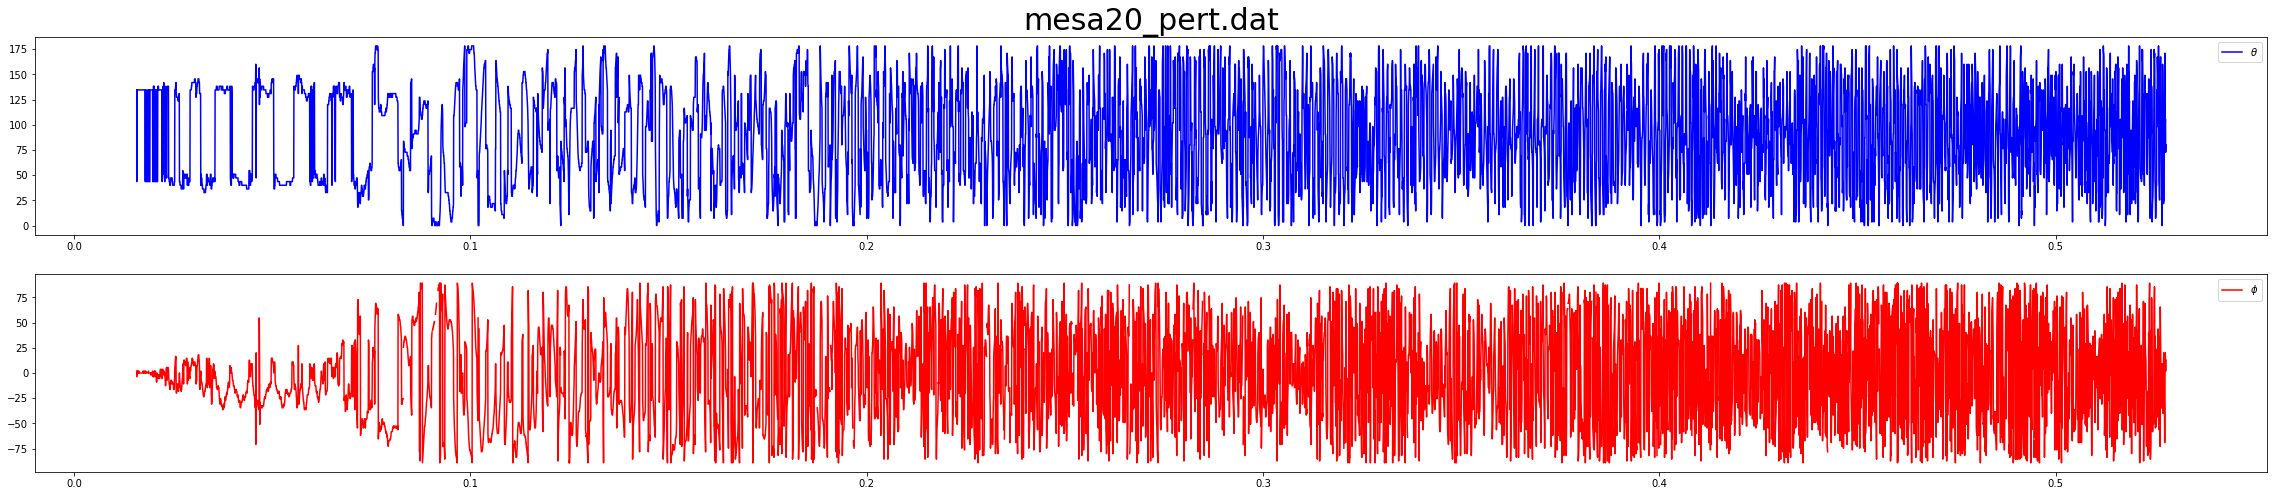

In [145]:
fig = plt.figure(figsize = (40,8))
axSV_MV_A1 = fig.add_subplot(211)
axSV_MV_A2 = fig.add_subplot(212)

axSV_MV_A1.plot(time, np.degrees(theta), c = 'blue', label = r'$\theta$')
axSV_MV_A2.plot(time, np.degrees(phi), c = 'red', label = '$\phi$')
axSV_MV_A1.set_title(dataUsed, fontsize = 30)
axSV_MV_A1.legend()
axSV_MV_A2.legend()

## Dipole Direction Fourier Transform Plot Work

C:\Users\crazy\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\crazy\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


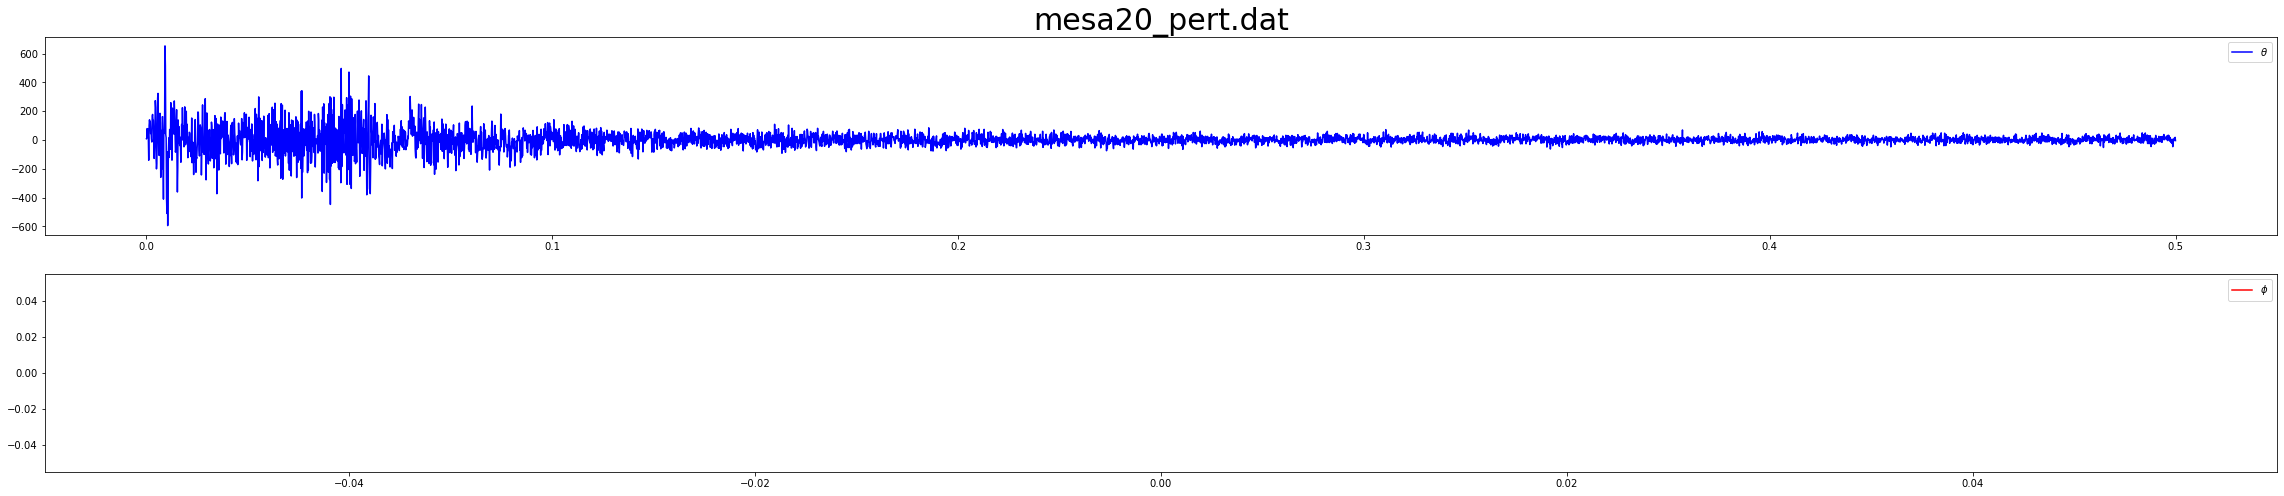

In [149]:
fig = plt.figure(figsize = (40,8))
axSV_MV_F1 = fig.add_subplot(211)
axSV_MV_F2 = fig.add_subplot(212)

axSV_MV_F1.plot(np.fft.rfftfreq(len(time))[1:], np.fft.rfft(theta, axis = 0)[1:], c = 'blue', label = r'$\theta$')
axSV_MV_F2.plot(np.fft.rfftfreq(len(time))[1:], np.fft.rfft(phi, axis = 0)[1:], c = 'red', label = '$\phi$')
axSV_MV_F1.set_title(dataUsed, fontsize = 30)
axSV_MV_F1.legend()
axSV_MV_F2.legend()